In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('dataset/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

dataset/test.csv
dataset/train.csv


In [2]:
#importing libraries
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")
import matplotlib  
import statsmodels.formula.api as smf    
import statsmodels.api as sm  
from sklearn.preprocessing import robust_scale
from sklearn import model_selection, preprocessing, feature_selection, ensemble, linear_model, metrics, decomposition
## for explainer    
from lime import lime_tabular
from mlxtend.preprocessing import minmax_scaling
from scipy import stats
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing._data import QuantileTransformer
from sklearn.preprocessing._data import PowerTransformer
from sklearn.linear_model import LogisticRegression
from scipy.stats import skew
from sklearn.tree import DecisionTreeRegressor
pd.set_option('display.max_rows', 1000)
## for data
import pandas as pd
import numpy as np
from pylab import rcParams
rcParams['figure.figsize'] = 8, 5
## for plotting
import matplotlib.pyplot as plt
import seaborn as sns
SEED=2020
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
kf = KFold(n_splits = 5, random_state = 2, shuffle=True)
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import mean_squared_log_error
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import RFECV
## for statistical tests
import scipy
import statsmodels.formula.api as smf
import statsmodels.api as sm
## for machine learning
from sklearn import model_selection, preprocessing, feature_selection, ensemble, linear_model, metrics, decomposition
## for explainer
from lime import lime_tabular
## for machine learning
from sklearn import model_selection, preprocessing, feature_selection, ensemble, linear_model, metrics, decomposition
from collections import Counter
from numpy import mean
from IPython.core.interactiveshell import InteractiveShell 
InteractiveShell.ast_node_interactivity = "all"
import xgboost as xgb


In [3]:
## importing and taking a look for dataset
train= pd.read_csv('dataset/train.csv')
train.sample(20)

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
1096,2177,128.36,j,aa,ah,d,d,ab,a,g,...,0,1,0,0,0,0,0,0,0,0
296,590,90.52,f,s,m,c,d,i,g,i,...,0,0,1,0,0,0,0,0,0,0
364,723,100.64,f,s,m,c,d,d,j,a,...,0,0,1,0,0,0,0,0,0,0
1144,2270,118.23,ay,b,b,c,d,ab,l,r,...,0,0,1,0,0,0,0,0,0,0
3724,7474,91.40,o,s,as,c,d,v,g,i,...,1,0,0,0,0,0,0,0,0,0
519,1006,100.42,t,aa,ay,g,d,d,j,o,...,1,0,0,0,0,0,0,0,0,0
4004,8032,77.77,az,v,n,f,d,w,g,j,...,0,0,0,1,0,0,0,0,0,0
2704,5409,102.77,aj,v,r,a,d,m,g,v,...,0,0,1,0,0,0,0,0,0,0
3557,7103,87.40,s,v,ai,g,d,r,j,d,...,1,0,0,0,0,0,0,0,0,0
451,878,91.45,ai,b,as,d,d,d,c,l,...,0,0,0,0,0,1,0,0,0,0


In [4]:
test = pd.read_csv('dataset/test.csv')
test.sample(20)

,ID,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
2040,4080,ay,i,as,a,d,l,j,k,0,...,0,0,1,0,0,0,0,0,0,0
4193,8389,f,p,ak,c,d,aa,j,h,0,...,1,0,0,0,0,0,0,0,0,0
1504,3014,s,aa,m,c,d,ad,j,x,0,...,1,0,0,0,0,0,0,0,0,0
425,871,s,aa,m,g,d,d,i,g,0,...,1,0,0,0,0,0,0,0,0,0
1065,2138,t,b,as,c,d,ag,d,j,0,...,0,0,1,0,0,0,0,0,0,0
3317,6663,s,aa,ak,c,d,s,i,c,0,...,1,0,0,0,0,0,0,0,0,0
3781,7545,j,i,as,a,d,v,l,n,0,...,0,0,1,0,0,0,0,0,0,0
707,1441,w,s,as,c,d,af,i,j,0,...,1,0,0,0,0,0,0,0,0,0
89,167,s,b,ae,c,d,j,a,e,0,...,0,0,1,0,0,0,0,0,0,0
955,1918,aj,l,as,f,d,ag,g,f,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
train.shape

(4209, 378)

In [6]:
test.shape

(4209, 377)

In [7]:
one_value_cols = [col for col in train.columns if train[col].nunique() <= 1]
print(f'There are {len(one_value_cols)} columns in train dataset with one unique value.')

There are 12 columns in train dataset with one unique value.


In [8]:
# DF before tuning
def basic_details(df):
    b = pd.DataFrame()
    b['Missing value'] = df.isnull().sum()
    b['N unique value'] = df.nunique()
    b['dtype'] = df.dtypes
    return b
basic_details(train)

,Missing value,N unique value,dtype
ID,0,4209,int64
y,0,2545,float64
X0,0,47,object
X1,0,27,object
X2,0,44,object
X3,0,7,object
X4,0,4,object
X5,0,29,object
X6,0,12,object
X8,0,25,object


 Some preliminary conclusions:
  - no missing values in dataset
  - 8 object features, rest - binary
  - 12 features with 1 unique value

In [9]:
## drop features with 1 unique value
# train.drop(['ID','X11','X107', 'X233', 'X235', 'X268','X289', 'X290','X293', 'X297', 'X330', 'X347'], axis=1, inplace=True)
train.drop(one_value_cols, axis=1, inplace=True)


In [10]:
## drop features with low variabiliry
variance_treshold = 0.9
low_var_cols = [col for col in train.columns if train[col].value_counts(dropna=False, normalize=True).values[0] > variance_treshold]
train=train.drop(low_var_cols, axis=1) 

In [11]:
## add some additional features, thanks for this script to @ Vitalii Mokin
def feature_creation(df):
    for i in ['X0', 'X1', 'X2', 'X3', 'X5', 'X6', 'X8']:
        for j in ['X0', 'X1', 'X2', 'X3', 'X5', 'X6', 'X8']:
            df[i + "_" + j] = df[i].astype('str') + "_" + df[j].astype('str')

    return df


train = feature_creation(train)

In [12]:
train.sample(5)

,ID,y,X0,X1,X2,X3,X5,X6,X8,X14,...,X6_X5,X6_X6,X6_X8,X8_X0,X8_X1,X8_X2,X8_X3,X8_X5,X8_X6,X8_X8
2504,5017,88.00,z,aa,ai,g,n,j,b,0,...,j_n,j_j,j_b,b_z,b_aa,b_ai,b_g,b_n,b_j,b_b
1896,3799,88.87,s,b,ae,c,ah,g,i,0,...,g_ah,g_g,g_i,i_s,i_b,i_ae,i_c,i_ah,i_g,i_i
2651,5311,84.53,s,aa,d,e,m,j,m,0,...,j_m,j_j,j_m,m_s,m_aa,m_d,m_e,m_m,m_j,m_m
3553,7096,94.84,o,w,ak,f,r,a,f,0,...,a_r,a_a,a_f,f_o,f_w,f_ak,f_f,f_r,f_a,f_f
335,667,88.69,z,aa,as,d,i,j,o,1,...,j_i,j_j,j_o,o_z,o_aa,o_as,o_d,o_i,o_j,o_o


In [13]:
## encode object features to numeric
lencoders = {}
for col in train.select_dtypes(include=['object']).columns:
    lencoders[col] = LabelEncoder()
    train[col] = lencoders[col].fit_transform(train[col])


In [14]:
# and drop duplicates
train = train.drop_duplicates()
# train.T.drop_duplicates().T

<AxesSubplot:xlabel='y'>

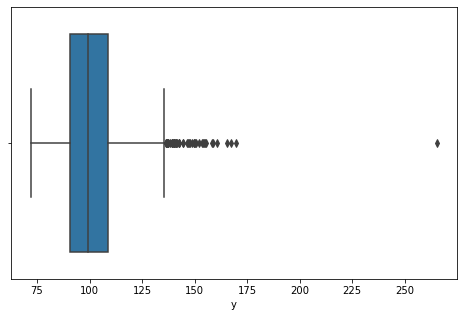

In [15]:
## target with outliers
sns.boxplot((train.y))

In [16]:
# delete some outliers from target feature
train = train[(train['y'] <= 136)].reset_index(drop=True)

<AxesSubplot:xlabel='y'>

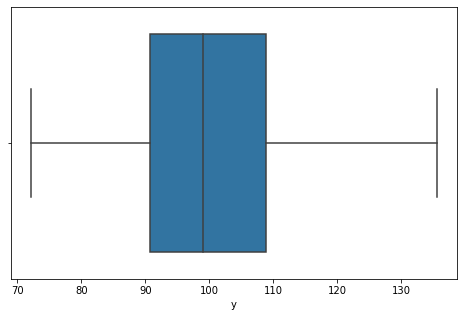

In [17]:
## target without outliers
sns.boxplot((train.y))

In [18]:
# target normalization between 0 and 1 values
train["y"]=((train["y"]-train["y"].min())/(train["y"].max()-train["y"].min()))

In [19]:
## result
train.y.describe()

count    4159.000000
mean        0.441283
std         0.180324
min         0.000000
25%         0.294387
50%         0.423526
75%         0.578839
max         1.000000
Name: y, dtype: float64

In [20]:
## let's reduce memory for clear mind

def reduce_memory_usage(df):
    """ The function will reduce memory of dataframe
    Note: Apply this function after removing missing value"""
    intial_memory = df.memory_usage().sum()/1024**2
    print('Intial memory usage:',intial_memory,'MB')
    for col in df.columns:
        mn = df[col].min()
        mx = df[col].max()
        if df[col].dtype != object:            
            if df[col].dtype == int:
                if mn >=0:
                    if mx < np.iinfo(np.uint8).max:
                        df[col] = df[col].astype(np.uint8)
                    elif mx < np.iinfo(np.uint16).max:
                        df[col] = df[col].astype(np.uint16)
                    elif mx < np.iinfo(np.uint32).max:
                        df[col] = df[col].astype(np.uint32)
                    elif mx < np.iinfo(np.uint64).max:
                        df[col] = df[col].astype(np.uint64)
                else:
                    if mn > np.iinfo(np.int8).min and mx < np.iinfo(np.int8).max:
                        df[col] = df[col].astype(np.int8)
                    elif mn > np.iinfo(np.int16).min and mx < np.iinfo(np.int16).max:
                        df[col] = df[col].astype(np.int16)
                    elif mn > np.iinfo(np.int32).min and mx < np.iinfo(np.int32).max:
                        df[col] = df[col].astype(np.int32)
                    elif mn > np.iinfo(np.int64).min and mx < np.iinfo(np.int64).max:
                        df[col] = df[col].astype(np.int64)
            if df[col].dtype == float:
                df[col] =df[col].astype(np.float32)
    
    red_memory = df.memory_usage().sum()/1024**2
    print('Memory usage after complition: ',red_memory,'MB')
    
reduce_memory_usage(train)

Intial memory usage: 4.696258544921875 MB
Memory usage after complition:  0.6823310852050781 MB


In [21]:
# Threshold for removing correlated variables, thanks to @ Vitalii Mokin
threshold = 0.9  ## optimal level 0.9
# Absolute value correlation matrix
corr_matrix = train.corr().abs().round(2)
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
# Select columns with Pearson's correlations above threshold
collinear_features = [column for column in upper.columns if any(upper[column] > threshold)]
features_filtered = train.drop(columns = collinear_features)
print('The number of features that passed the collinearity threshold: ', features_filtered.shape[1])
features_best = []
features_best.append(features_filtered.columns.tolist())

The number of features that passed the collinearity threshold:  77


In [22]:
# updated dataframe
train=train[features_best[0]]
train.sample(20)

,ID,y,X0,X1,X2,X3,X5,X6,X8,X14,...,X334,X336,X350,X351,X354,X355,X356,X374,X375,X377
3947,8014,0.578839,43,23,40,3,26,9,6,0,...,1,1,0,0,0,0,0,0,0,0
196,404,0.295963,6,3,7,2,13,9,9,0,...,1,0,0,0,1,1,1,0,0,1
2555,5181,0.258909,46,1,7,6,17,6,4,0,...,0,0,0,0,0,1,0,0,1,0
1672,3401,0.403027,7,20,16,0,4,11,6,1,...,1,0,0,0,1,0,0,0,0,1
3804,7729,0.425891,19,19,16,5,26,6,9,1,...,0,0,0,1,0,1,0,1,0,0
932,1881,0.410911,46,19,24,5,6,6,15,0,...,0,0,0,0,0,1,0,1,0,0
2507,5087,0.307159,27,20,16,2,18,3,12,1,...,1,0,0,0,1,0,0,0,0,1
3096,6285,0.607695,0,23,31,0,21,9,4,0,...,1,0,0,1,1,0,0,0,0,0
3085,6265,0.211921,45,19,26,5,21,9,18,0,...,0,0,0,0,0,1,0,1,0,0
3004,6112,0.417219,35,13,3,5,21,6,14,0,...,0,0,1,0,0,0,0,1,0,0


In [23]:
X = train.drop('y', axis=1)
y = train.y
Xtest = test
ytest = None
X['n0'] = (X == 0).sum(axis=1) ## one add feature
# scale features between 1 and 0
scaler = preprocessing.MinMaxScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns = X.columns)
X.sample(10)

,ID,X0,X1,X2,X3,X5,X6,X8,X14,X20,...,X336,X350,X351,X354,X355,X356,X374,X375,X377,n0
772,0.181894,0.478261,0.038462,0.162791,1.000000,0.178571,1.000000,0.708333,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.393939
71,0.018890,0.978261,0.884615,0.162791,0.333333,0.500000,0.545455,0.458333,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.636364
1071,0.256742,0.630435,0.000000,0.186047,0.833333,0.035714,1.000000,0.833333,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.818182
3284,0.789236,0.543478,0.384615,0.372093,0.333333,0.821429,1.000000,0.208333,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.424242
1029,0.247475,0.934783,0.769231,0.372093,0.333333,0.214286,0.818182,0.166667,1.0,0.0,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.272727
4023,0.969110,0.782609,0.884615,0.069767,0.333333,0.928571,0.272727,0.541667,0.0,1.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.393939
1254,0.299869,0.434783,0.500000,0.790698,0.833333,0.035714,1.000000,0.208333,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.727273
3054,0.739099,0.978261,0.730769,0.162791,0.833333,0.750000,0.545455,0.625000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.575758
591,0.138173,0.869565,0.115385,0.767442,0.333333,0.285714,0.727273,0.166667,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.242424
616,0.144113,0.869565,0.115385,0.767442,0.333333,0.285714,0.545455,0.541667,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.303030


In [24]:
# baseline score
X_train = X 
X_test = Xtest  
y_train = y
y_test = ytest
# prepare the model with target scaling
rf = RandomForestRegressor(max_depth=4, n_estimators=5, random_state=SEED)
# evaluate model
cv = KFold(n_splits=10, shuffle=True, random_state=SEED)
scores = cross_val_score(rf, X, y, scoring='r2', cv=cv, n_jobs=-1)
# summarize the result
s_mean = mean(scores)
print('Mean R2: %.3f' % (s_mean))

Mean R2: 0.642


In [25]:
## Feature ranking with recursive feature elimination and cross-validated selection of the best number of features
# regressor =RandomForestRegressor(random_state=SEED)
# regressor = DecisionTreeRegressor()
regressor = xgb.XGBRegressor()
selector = RFECV(regressor, step = 1, cv=cv, n_jobs=-1,verbose=1,  scoring='r2')
selector.fit(X, y)
print('The optimal number of features is {}'.format(selector.n_features_))
features_rfecv = [f for f,s in zip(X, selector.support_) if s]
print('The selected features are:')
print ('{}'.format(features_rfecv)) ## optimal features list

Fitting estimator with 77 features.
Fitting estimator with 77 features.
Fitting estimator with 77 features.
Fitting estimator with 77 features.Fitting estimator with 77 features.

Fitting estimator with 77 features.
Fitting estimator with 77 features.
Fitting estimator with 77 features.
Fitting estimator with 77 features.
Fitting estimator with 77 features.
Fitting estimator with 76 features.
Fitting estimator with 76 features.
Fitting estimator with 76 features.
Fitting estimator with 76 features.
Fitting estimator with 76 features.
Fitting estimator with 76 features.
Fitting estimator with 76 features.
Fitting estimator with 76 features.
Fitting estimator with 76 features.
Fitting estimator with 76 features.
Fitting estimator with 75 features.
Fitting estimator with 75 features.
Fitting estimator with 75 features.
Fitting estimator with 75 features.
Fitting estimator with 75 features.
Fitting estimator with 75 features.
Fitting estimator with 75 features.
Fitting estimator with 75 fe

RFECV(cv=KFold(n_splits=10, random_state=2020, shuffle=True),
      estimator=XGBRegressor(base_score=None, booster=None,
                             colsample_bylevel=None, colsample_bynode=None,
                             colsample_bytree=None, enable_categorical=False,
                             gamma=None, gpu_id=None, importance_type=None,
                             interaction_constraints=None, learning_rate=None,
                             max_delta_step=None, max_depth=None,
                             min_child_weight=None, missing=nan,
                             monotone_constraints=None, n_estimators=100,
                             n_jobs=None, num_parallel_tree=None,
                             predictor=None, random_state=None, reg_alpha=None,
                             reg_lambda=None, scale_pos_weight=None,
                             subsample=None, tree_method=None,
                             validate_parameters=None, verbosity=None),
      n_jobs=-

The optimal number of features is 4
The selected features are:
['X118', 'X127', 'X261', 'X275']


<Figure size 576x360 with 0 Axes>

Text(0.5, 0, 'Number of features selected')

Text(0, 0.5, 'Cross validation score (R2)')

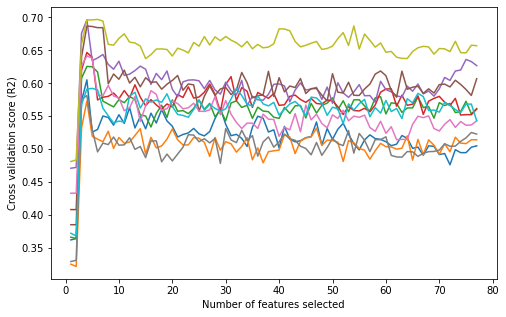

In [29]:
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (R2)")
plt.plot(range(1, len(selector.grid_scores_) + 1), selector.grid_scores_)
plt.savefig('feature_auc_nselected.png', bbox_inches='tight', pad_inches=1)

In [27]:
## let's compare RF after feature selection
rf = RandomForestRegressor(max_depth=3, n_estimators=10, random_state=SEED)
X_rfe = X[features_rfecv]
rf.fit(X_rfe, y)
# acc_log_train = round(rf.score(X_train_rfe, y_train)*100,2) 
# acc_log_test = round(rf.score(X_test[features_rfecv],y_test)*100,2)
scores = cross_val_score(rf, X_rfe, y, cv=cv, scoring = 'r2')
# print("Training Accuracy: % {}".format(acc_log_train))
# print("Testing Accuracy: % {}".format(acc_log_test))
print("RF based on selected dataset")
print("FR CV Accuracy Score after selection:", scores.mean().round(3))

RandomForestRegressor(max_depth=3, n_estimators=10, random_state=2020)

RF based on selected dataset
FR CV Accuracy Score after selection: 0.635


So we got list of 4 best features with the same model score

In [42]:
## feature importance with eli5 
import eli5 
import shap 
from eli5.sklearn import PermutationImportance
rf.fit(X_rfe, y)
perm = PermutationImportance(rf, random_state=SEED).fit(X_rfe, y)
eli5.show_weights(perm, feature_names = X_rfe.columns.tolist())

ImportError: Numba needs NumPy 1.20 or less

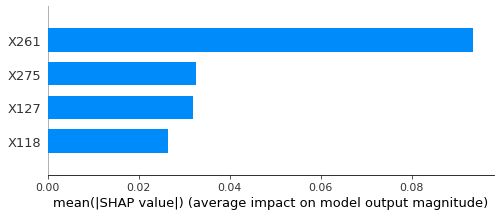

In [ ]:
explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_rfe)
shap.summary_plot(shap_values, X_rfe, plot_type="bar")

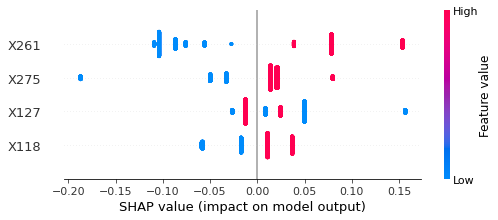

In [ ]:

shap.summary_plot(shap_values, X_rfe)

So we can spend our time taking in account only this 4 features during car tests

In [30]:
# Function to calculate mean absolute error
def mae(y_true, y_pred):
    return np.mean(abs(y_true - y_pred))

baseline_guess = np.median(y)

print('The baseline guess based on Y-median value %0.2f' % baseline_guess)
print("Baseline Performance based on Y-median value: MAE = %0.4f" % mae(y_test, baseline_guess))
print("Baseline Performance based on Random Forest RFECV-model: MAE = %0.4f" % mae(y_test, rf.predict(X_test[features_rfecv])))

The baseline guess based on Y-median value 0.42


TypeError: unsupported operand type(s) for -: 'NoneType' and 'float'

In [ ]:
output = pd.DataFrame({'ID': test.ID, 'y': y_pred})
output.to_csv('mercedes_benz_recursive_feature_final_submission.csv', index=False)